In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

In [2]:
def kon(wm, wd, c):
    mu_c = np.log(c) - 0.5 * np.log(2 * np.exp(wd) * c + np.sqrt(4 * np.exp(wd) * c + 1) + 1)
    s_on = np.exp(mu_c)
    kon = s_on / c
    return kon

def koff(wm, wd, m):
    mu_m = np.log(m) - wm - 0.5 * np.log(2 * np.exp(wd) * m + np.sqrt(4 * np.exp(wd) * m + 1) + 1)
    s_off = np.exp(mu_m)
    koff = s_off / m
    return koff

In [3]:
n = 100
mem_energy = np.linspace(0.001, 10, n)
dim_energy = np.linspace(0, 20, n)
X, Y = np.meshgrid(mem_energy, dim_energy)

In [4]:
# import ipywidgets as widgets

# fig, ax = plt.subplots()
# @widgets.interact(log_c=(-8, -3, 0.5))
# def update(log_c=-8):
#     ax.clear()
#     _kon = kon(X, Y, 10 ** log_c)
#     ax.imshow(np.log10(_kon), origin='lower', vmin=-3, vmax=0)

In [5]:
# import ipywidgets as widgets

# fig, ax = plt.subplots()
# @widgets.interact(log_m=(-5, -2, 0.5))
# def update(log_m=-7):
#     ax.clear()
#     _koff = koff(X, Y, 10 ** log_m)
#     ax.imshow(np.log10(_koff), origin='lower', extent=(0, 10, 0, 20), aspect=0.5, vmin=-7, vmax=0)
#     contours = ax.contour(X, Y, np.log10(_koff), colors='white', levels=np.arange(-8, 1, 1))
#     ax.clabel(contours, inline=True, fontsize=6, fmt='%1.1f')

### Figs koff

<IPython.core.display.Javascript object>


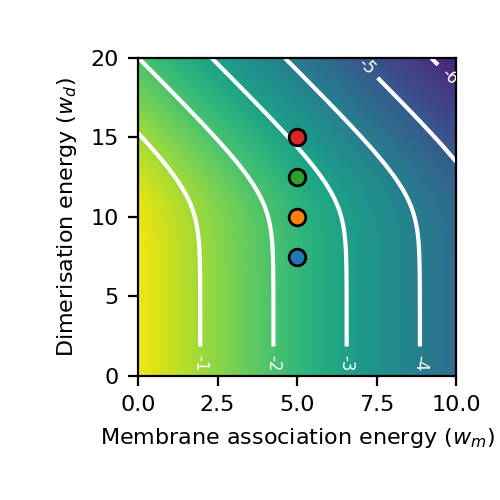

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(2.5, 2.5)
log_m = -5
_koff = koff(X, Y, 10 ** log_m)
ax.imshow(np.log10(_koff), origin='lower', extent=(0, 10, 0, 20), aspect=0.5, vmin=-7, vmax=0)
contours = ax.contour(X, Y, np.log10(_koff), colors='white', levels=np.arange(-8, 1, 1), linestyles='solid')
ax.clabel(contours, inline=True, fontsize=6, fmt='%i')
fig.tight_layout()

ax.scatter(5, 7.5, edgecolors='k', zorder=10)
ax.scatter(5, 10, edgecolors='k', zorder=10)
ax.scatter(5, 12.5, edgecolors='k', zorder=10)
ax.scatter(5, 15, edgecolors='k', zorder=10)

ax.set_xlabel('Membrane association energy ' + r'$(w_m)$', fontsize=8)
ax.set_ylabel('Dimerisation energy ' + r'$(w_d)$', fontsize=8)
ax.tick_params(axis='both', labelsize=8)
fig.tight_layout()
fig.savefig('Figs/kinetics_koff_energies.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


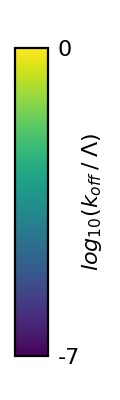

In [7]:
fig, ax = plt.subplots(figsize=(0.6, 2))
fig.subplots_adjust(right=0.4)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('viridis'), ticks=[0, 1])
cbar.ax.set_yticklabels(['-7', '0'])
cbar.ax.tick_params(size=0, labelsize=8)
ax.set_ylabel(r'$log_{10}(k_{off}  \: / \: \Lambda)$', labelpad=0, fontsize=8)
fig.savefig('Figs/kinetics_koff_energies_cbar.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


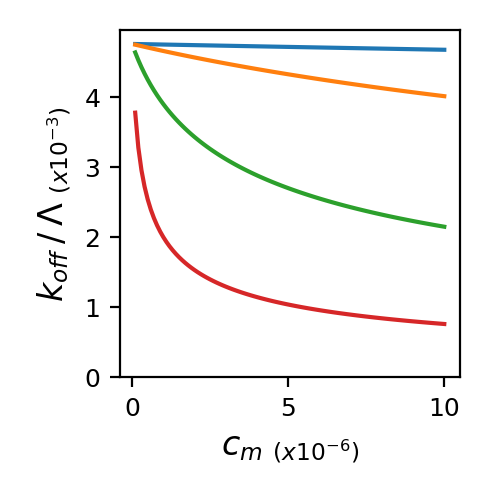

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(2.5, 2.5)

def func(ax, wm, wd):
    ms = np.linspace(1e-7, 1e-5, 100)
    _koff = koff(wm=wm, wd=wd, m=ms)
    ax.plot(ms / 1e-6, _koff / 1e-3, label=wd)
    
func(ax, 5, 7.5)
func(ax, 5, 10)
func(ax, 5, 12.5)
func(ax, 5, 15)

ax.set_ylabel(r'$k_{off} \: / \: \Lambda \; _{(x10^{-3})}$', fontsize=12)
ax.set_xlabel(r'$c_m \; _{(x10^{-6})}$', fontsize=12)
ax.tick_params(axis='both', labelsize=9)
ax.set_ylim(bottom=0)
# ax.legend(frameon=False, title=r'$w_d$', fontsize=8)

fig.tight_layout()
fig.savefig('Figs/kinetics_koff_concentration.png', dpi=600, transparent=True)